In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn import tree

In [6]:
hd = pd.read_csv('C:/Users/admin/Downloads/HeartDiseaseData.csv') 

In [7]:
hd.head()

,Unnamed: 0,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
1,2,2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
2,3,3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
3,4,4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
4,5,5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [8]:
hd.shape

(457, 14)

In [9]:
hd.size

6398

In [10]:
hd.dtypes

Unnamed: 0      int64
ID              int64
Age             int64
Sex            object
cp             object
trestbps      float64
chol          float64
fbs            object
restecg        object
thalach       float64
exang          object
oldpeak       float64
num             int64
Place          object
dtype: object

In [11]:
hd.get_dtype_counts()

float64    4
int64      4
object     6
dtype: int64

In [12]:
hd = hd.drop(['Unnamed: 0', 'ID', 'Place'], axis=1)

In [13]:
hd.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0
1,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0
2,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0
3,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0
4,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0


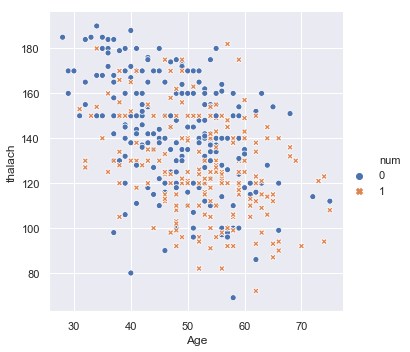

In [14]:
sns.relplot(x="Age", y="thalach", hue="num", style="num", data=hd)

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


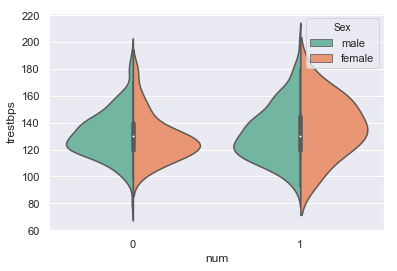

In [15]:
sns.violinplot(x="num", y="trestbps", hue="Sex",
...                     data=hd, palette="Set2", split=True,
...                     scale="width")

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


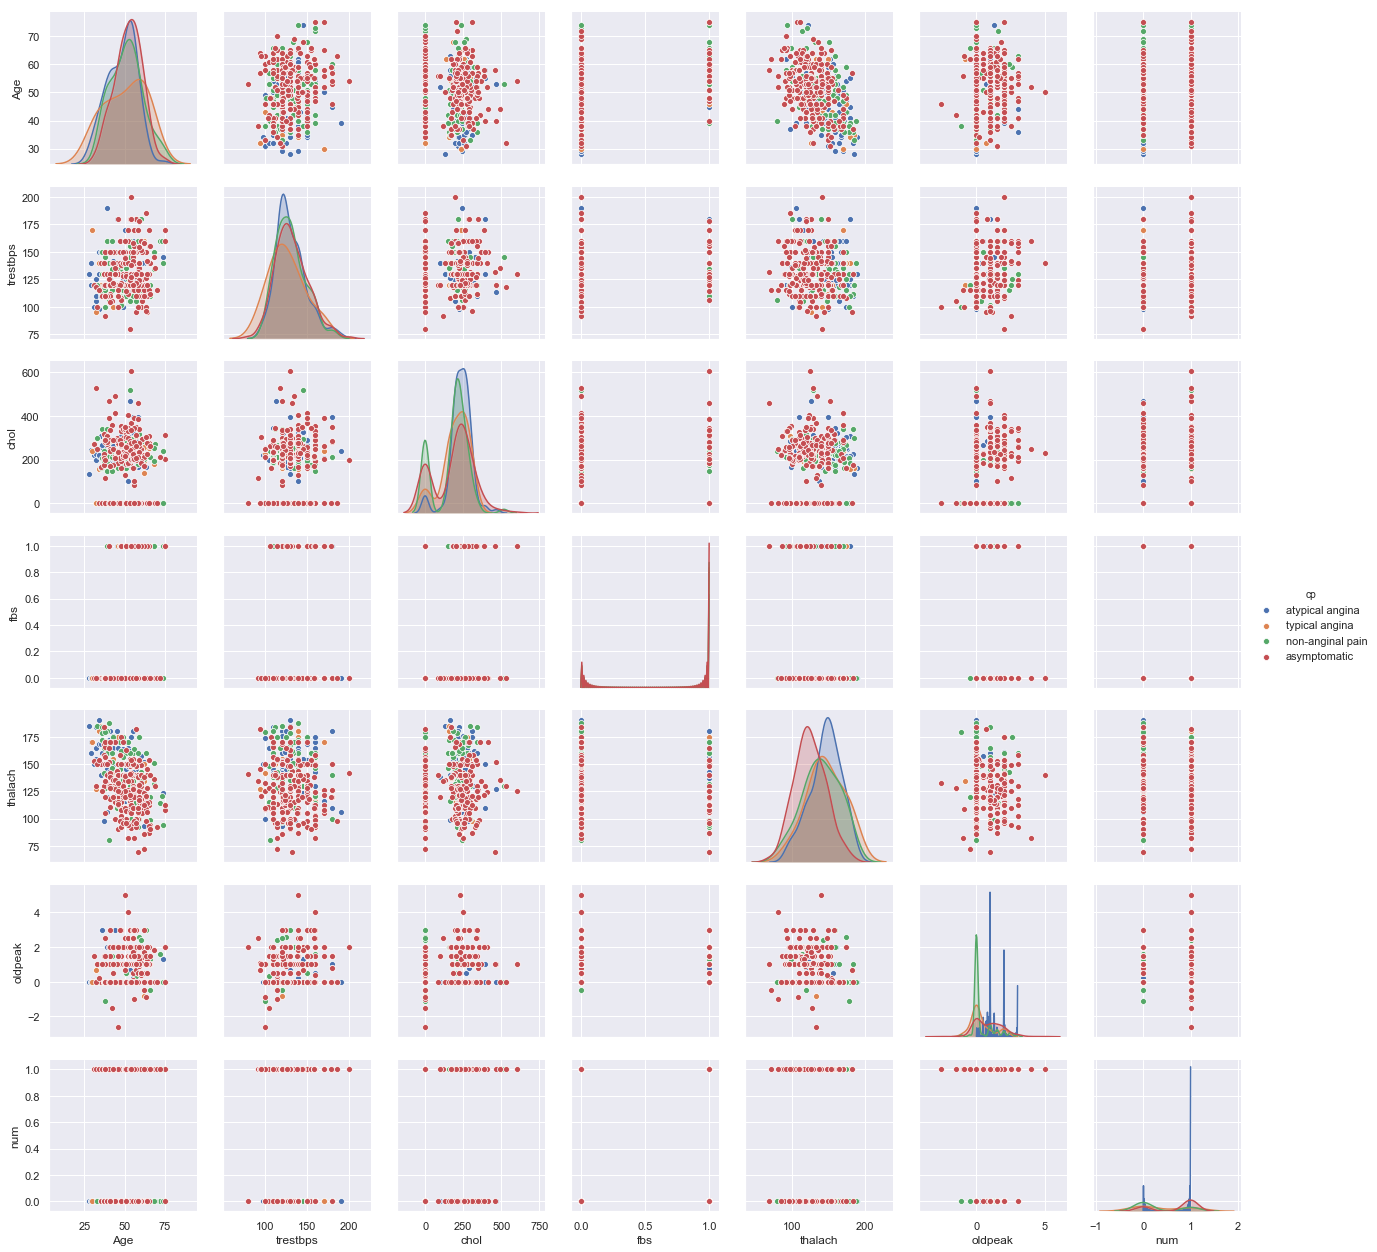

In [16]:
sns.pairplot(hd, hue="cp")

In [17]:
hd.isnull().sum()

Age          0
Sex          0
cp           0
trestbps    33
chol        26
fbs         54
restecg      2
thalach     33
exang       33
oldpeak     36
num          0
dtype: int64

In [18]:
hd = hd.fillna({'trestbps': hd.Age.median(), 
                'chol': hd.Age.median(), 
                'fbs': hd.Age.median(),
                 'restecg': hd.Age.median(), 
                'thalach': hd.Age.median(), 
                'exang': hd.Age.median(), 
                'oldpeak': hd.Age.median(),})

In [19]:
data = pd.get_dummies(hd)

In [20]:
data = data.rename(columns = {'cp_atypical angina': 'atypical_angina', 
                              'cp_asymptomatic': 'asymptomatic', 
                              'cp_non-anginal pain': 'no_anginal_pain', 
                              'cp_typical angina': 'typical_angina', 
                              'restecg_having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV': 'restecg_having_ST_T', 
                              'restecg_showing probable or definite left ventricular hypertrophy by Estes criteria': 'restecg_left_ventricular_hypertrophy', 
                              'fbs_52.0': 'fbs_52', 
                              'restecg_52.0': 'restecg_52', 
                              'exang_52.0': 'exang_52'})


In [21]:
data.head()

,Age,trestbps,chol,thalach,oldpeak,num,Sex_female,Sex_male,asymptomatic,atypical_angina,...,fbs_False,fbs_True,fbs_52,restecg_52,restecg_having_ST_T,restecg_normal,restecg_left_ventricular_hypertrophy,exang_52,exang_no,exang_yes
0,28,130.0,132.0,185.0,0.0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
1,29,120.0,243.0,160.0,0.0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
2,29,140.0,52.0,170.0,0.0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
3,30,170.0,237.0,170.0,0.0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,31,100.0,219.0,150.0,0.0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0


In [22]:
x = data.drop("num", axis = 1)
y = data[["num"]]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

x = x.assign(Age = le.fit_transform(x.Age),
              asymptomatic = le.fit_transform(x.asymptomatic),
              atypical_angina = le.fit_transform(x.atypical_angina),
              no_anginal_pain = le.fit_transform(x.no_anginal_pain), 
              typical_angina = le.fit_transform(x.typical_angina),    
              trestbps = le.fit_transform(x.trestbps), 
              fbs_52 = le.fit_transform(x.fbs_52),
              chol = le.fit_transform(x.chol),
              fbs_True = le.fit_transform(x.fbs_True),
              restecg_52 = le.fit_transform(x.restecg_52), 
              restecg_having_ST_T = le.fit_transform(x.restecg_having_ST_T), 
              restecg_normal = le.fit_transform(x.restecg_normal), 
              restecg_left_ventricular_hypertrophy = le.fit_transform(x.restecg_left_ventricular_hypertrophy), 
              exang_52 = le.fit_transform(x.exang_52), 
              exang_no = le.fit_transform(x.exang_no), exang_yes = le.fit_transform(x.exang_yes),
              thalach = le.fit_transform(x.thalach),
              oldpeak = le.fit_transform(x.oldpeak))


In [23]:
from sklearn import tree

In [26]:
clf.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,

In [25]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
clf.score(x, y)

0.787746170678337

In [44]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
clf.score(x, y)

0.787746170678337

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [47]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
clf.score(x_train, y_train)

0.8137254901960784

In [49]:
clf.score(x_test, y_test)

0.695364238410596

In [34]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [50]:
from IPython.display import HTML
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)

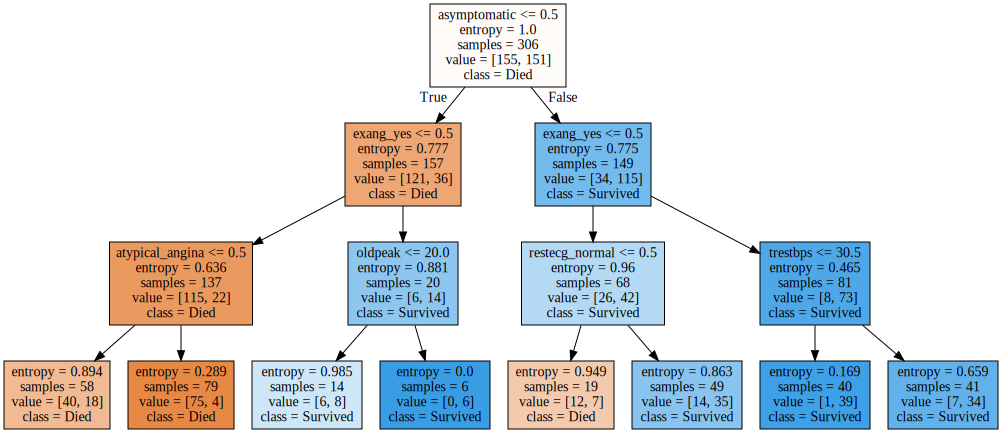

In [51]:
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=list(x), class_names=['Died', 'Survived'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

In [38]:
max_depth_values = range(1, 50)
classifier_score_data = pd.DataFrame()

In [39]:
from sklearn.model_selection import cross_val_score

for max_dept in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_dept)
    clf.fit(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    train_score = clf.score(x_train, y_train)
    
    mean_cross_val_score = cross_val_score(clf, x_train, y_train, cv = 5, scoring = 'precision').mean()
    
    classifier_score_data = classifier_score_data \
        .append(pd.DataFrame({'test_score': [test_score], 
                              'train_score': [train_score], 
                              'max_dept': [max_dept], 
                              'mean_cross_val_score': [mean_cross_val_score]}))

In [40]:
classifier_score_data.head()

,test_score,train_score,max_dept,mean_cross_val_score
0,0.715232,0.771242,1,0.783117
0,0.682119,0.797386,2,0.759558
0,0.695364,0.813725,3,0.771769
0,0.695364,0.843137,4,0.763585
0,0.682119,0.879085,5,0.730609


In [41]:
classifier_score_data = pd.melt(classifier_score_data,id_vars=['max_dept'], var_name='set_type', value_name='score')

In [42]:
classifier_score_data.head()

,max_dept,set_type,score
0,1,test_score,0.715232
1,2,test_score,0.682119
2,3,test_score,0.695364
3,4,test_score,0.695364
4,5,test_score,0.682119


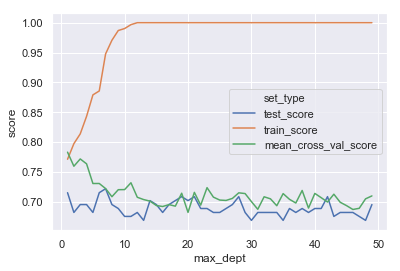

In [43]:
ax = sns.lineplot(x="max_dept", y="score",
                   hue="set_type", data=classifier_score_data)

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
cross_val_scores = cross_val_score(clf, x_train, y_train, cv=5)

In [54]:
cross_val_scores.mean()

0.7712850343733474